In [32]:
!pip install fastText
!pip install emoji
import fasttext
import sys
import os
import nltk
nltk.download('punkt')
import csv
import datetime
from bs4 import BeautifulSoup
import re
import itertools
import emoji


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
# DATA CLEANING
#
#####################################################################################

def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }


def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }


def strip_accents(text):
    if 'ø' in text or  'Ø' in text:
        #Do nothing when finding ø 
        return text   
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)


def tweet_cleaning_for_sentiment_analysis(tweet):    
    
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    #Special case not handled previously.
    tweet = tweet.replace('\x92',"'")
    #Removal of hastags/account
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    #Removal of address
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    #Removal of Punctuation
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
    #Lower case
    tweet = tweet.lower()
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    # Standardizing words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    #Deal with smileys
    #source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    #Strip accents
    tweet= strip_accents(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    
    # DO NOT REMOVE STOP WORDS FOR SENTIMENT ANALYSIS - OR AT LEAST NOT NEGATIVE ONES

    return tweet

In [35]:
# DATA PROCESSING
#
#####################################################################################

def transform_instance(row):
    cur_row = []
    #Prefix the index-ed label with __label__
    label = "__label__" + row[4]  
    cur_row.append(label)
    cur_row.extend(nltk.word_tokenize(tweet_cleaning_for_sentiment_analysis(row[2].lower())))
    return cur_row


def preprocess(input_file, output_file, keep=1):
    i=0
    with open(output_file, 'w', encoding = "ISO-8859-1") as csvoutfile:
        csv_writer = csv.writer(csvoutfile, delimiter=' ', lineterminator='\n')
        with open(input_file, 'r', newline='' , encoding = "ISO-8859-1") as csvinfile: #,encoding='latin1'
            csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
            for row in csv_reader:
                if row[4]!="MIXED" and row[4].upper() in ['POSITIVE','NEGATIVE','NEUTRAL'] and row[2]!='':
                    row_output = transform_instance(row)
                    csv_writer.writerow(row_output )
                i=i+1
                if i%10000 ==0:
                    print(i)

In [36]:
# Preparing the training dataset
preprocess('/content/gdrive/MyDrive/betsentiment-FR-tweets-sentiment-worldcup.csv', '/content/gdrive/MyDrive/tweets.train')

# Preparing the validation dataset        
preprocess('/content/gdrive/MyDrive/betsentiment-FR-tweets-sentiment-teams.csv', '/content/gdrive/MyDrive/tweets.validation')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
10000
20000
30000
40000
50000
60000


In [52]:
input_test = '/content/gdrive/MyDrive/betsentiment-FR-tweets-sentiment-teams.csv'
liste_row =[]
with open(input_test, 'r', newline='', encoding = "ISO-8859-1") as csvinfile: #,encoding='latin1'
            csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
            for row in csv_reader:
                print(row[2])
                print(row[4])
                liste_row.append(row)

Streaming output truncated to the last 5000 lines.
@TanguyNdombele contre @ManCity = ????
... Heureux de l'avoir rencontré quand il était encore à @AmiensSC ??Bon maintenant faut pensé à @equipedefrance ??????
NEUTRAL
Champions League Group C

PSG
Napoli
Liverpool
Red Star Belgrade

#UCLdraw #LFC
NEUTRAL
FINAL?
¡El LYON LE ROMPIO LA QUINELA A @Dparleymexico!

@SLBenfica 0-2 @FCBayern 
@ManCity 1-2 @OL 
@realmadrid 3-0 @OfficialASRoma 
#VictoriaPlz?n 2-1 @pfc_cska 
@valenciacf 0-2 @juventusfc 
@BSC_YB 0-3 @ManUtd 

#ZCD??
#ChampionsLeague??? https://t.co/JjJUmmHSO7
NEUTRAL
#Liverpool vs. #BorussiaDortmund | 2018 #InternationalChampionsCup I Predictions #FIFA18 #LFC #LiverpoolFC #LIV #Borussia #Dortmund #BVB #echteliebe #FKABVB #LIVBVB #LIVvBVB #LFCBVB  #ICC2018 #ChampionsCup #ICC #Football #Soccer #futbol #Fussball https://t.co/7WRS8mgBgH
NEUTRAL
Ed Woodward est à Monaco pour une réunion du Conseil Stratégique du Football professionnel. Transferts, VAR, agents et calendrier internationa

In [43]:
training_data_path = '/content/gdrive/MyDrive/tweets.train'
validation_data_path = '/content/gdrive/MyDrive/tweets.validation'
hyper_params = {"lr": 0.01,
    "epoch": 5,
    "wordNgrams": 2,
    "dim": 20}     
        
# Train the model.
model = fasttext.train_supervised(input=training_data_path, **hyper_params)
print("Model trained with the hyperparameter \n {}".format(hyper_params))

Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 5, 'wordNgrams': 2, 'dim': 20}


In [44]:
# CHECK PERFORMANCE      
result = model.test(training_data_path)
validation = model.test(validation_data_path)
        
# DISPLAY ACCURACY OF TRAINED MODEL
text_line = str(hyper_params) + ",accuracy:" + str(result[1])  + ",validation:" + str(validation[1]) + '\n' 
print(text_line)

{'lr': 0.01, 'epoch': 5, 'wordNgrams': 2, 'dim': 20},accuracy:0.8388585332088808,validation:0.8733705474960414



In [10]:
print(model.predict(['donald trump vient de negocier un nouveau traité'],k=1))
print(model.predict(['felicitations vous avez bien joué hier dans le match'],k=1)) 
print(model.predict(['on deplore une catastrophe naturel et de mauvais resultats'],k=1))
print(model.predict(['Vous avez mal joué ce jour desolé de mauvais resultats vous attendent'],k=1))

([['__label__NEUTRAL']], [array([0.9247424], dtype=float32)])
([['__label__NEUTRAL']], [array([0.8224264], dtype=float32)])
([['__label__NEUTRAL']], [array([0.812366], dtype=float32)])
([['__label__NEUTRAL']], [array([0.7452055], dtype=float32)])


In [57]:
print(validation)
print(result)

(62521, 0.8733705474960414, 0.8733705474960414)
(190702, 0.8388585332088808, 0.8388585332088808)


In [75]:
len([record[2] for record in liste_row])

62868

In [70]:
dataset = [tweet_cleaning_for_sentiment_analysis(record[2]) for record in liste_row]
dataset


['tweet_text',
 'deux nouveaux renforts pour les u18 reece devine un latral gauche qui est pass par wolverhampton et manchester city ainsi que connor stanley un ailier droit qui arrive en provenance de birmingham',
 'et mnt tout les algriens vont devenir suporteurs du',
 "fans de monaco pensez vous que c'est une bonne signature pour nous car je ne connais pas grand chose de lui",
 'welcome toi city etihad stadium',
 'vs | 2018/19 | predictions',
 "l' _officiel reste sur cinq dfaites conscutives au stade louis ii contre l' _monaco les marseillais parviendront ils rompre la dynamique la rponse demain 21h avec suivre en direct sur aprs le",
 '_officiel on va enfin boir nos recrues du mercato yes (bougez vous la a devient grave )',
 "_officiel force toi vraiment a a t un plaisir de t'avoir parmi on est de coeur avec toi bonne chance",
 "_plus il voulait dire 75m pour alison donc plus trop d'argent pour nabil c'est simple comprendre",
 'vs | 2018 i predictions ball',
 "ne manquez pas le mat

In [71]:
predictions = model.predict(dataset , k=1)

In [92]:
actual_labels = [record[4] for record in liste_row]

In [89]:
predicted_labels = []
for record in predictions[0]:
  if 'NEUTRAL' in record[0] :
    predicted_labels.append("NEUTRAL")
  if 'POSITIVE' in record[0] : 
    predicted_labels.append("POSITIVE")
  if 'NEGATIVE' in record[0] :
    predicted_labels.append("NEGATIVE")
  if 'MIXED' in record[0] : 
    predicted_labels.append("MIXED")
print(len(predicted_labels))


62868


In [95]:
predicted_labels.pop(0)
actual_labels.pop(0)
print(len(predicted_labels))
print(len(actual_labels))
print(predicted_labels)
print(actual_labels)

62867
62867
['NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUT

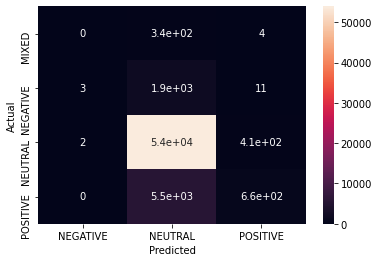

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {'y_Actual':    actual_labels,
        'y_Predicted': predicted_labels
        }
datadf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(datadf['y_Actual'], datadf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()